## Import libraries

In [ ]:
import os
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import pandas as pd
from ydata_profiling import ProfileReport  # One-stop-shop for initial profile of a dataset

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import glob


import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance

## Define reusable functions

#### Function for reading data from model dataset

In [2]:
def read_data(datafile):
    df_data = pd.read_csv(datafile, sep = ',', index_col=0)
    #df_data.columns=[]
    return df_data

## Read pre-processed multi-variable dataset

#### Set python variables

In [3]:
fpath = "..\\data\\all_raw_files"
fname_model_data = "model_data.csv"

#### Read dataset into pandas dataframe

In [4]:
# Read file
df_model_data = read_data(f'{fpath}\{fname_model_data}')

In [5]:
print(df_model_data)

     Year  Month  temp_mean  temp_min  temp_max  demand_mean   
0    2010      1  20.868008       1.6      41.1  8941.450389  \
1    2010      2  20.218907       3.2      35.4  8855.467677   
2    2010      3  19.828286       6.3      34.7  8698.725127   
3    2010      4  17.593856       6.5      29.9  8452.863411   
4    2010      5  15.323485       3.1      28.4  8897.770510   
..    ...    ...        ...       ...       ...          ...   
139  2021      8  21.104167      16.9      30.7  7368.353056   
140  2021      9  20.999306      14.2      27.5  7229.393819   
141  2021     10  21.084722      14.8      26.9  7209.823194   
142  2021     11  22.118056      15.7      27.3  7649.492569   
143  2021     12  23.685417      16.1      33.5  7986.625903   

     total_consumption  demand_max  demand_mean_max  pv_capacity  population   
0          6554083.135    13765.04     10613.530000    28278.392     7110454  \
1          5831325.465    13377.27     10380.667857    32153.986     71

In [9]:
df_model_data['year_month'] = df_model_data['Year'].astype(str) + '_' + df_model_data['Month'].astype(str)

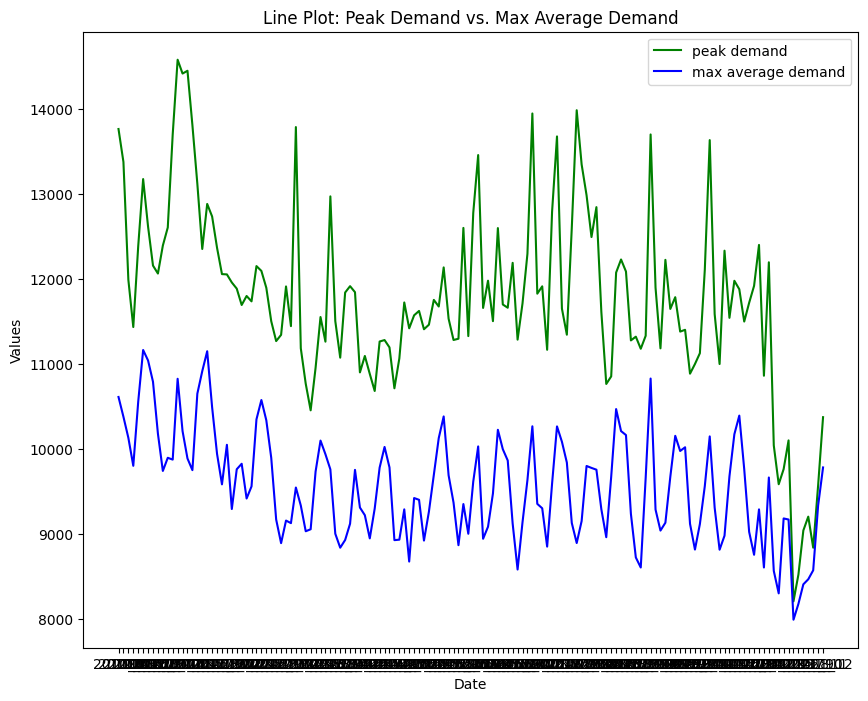

In [14]:
# Plot the two columns
x = df_model_data['year_month']
y1 = df_model_data['demand_max']
y2 = df_model_data['demand_mean_max']

plt.figure(figsize=(10, 8))  # Optional: Set figure size
plt.plot(x, y1, label='peak demand', color='green')
plt.plot(x, y2, label='max average demand', color='blue')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Line Plot: Peak Demand vs. Max Average Demand')
plt.legend()
plt.show()